# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [4]:
for City in df['City'].unique():
    print(City)   

Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing


In [5]:
len(df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [6]:
data= []

df['Medal'].unique()
data = df[df['Medal'] == 'Gold']
data = data['Sport'].value_counts().head()
data

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

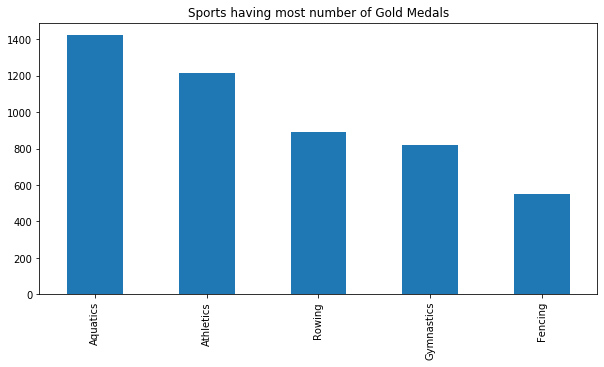

In [7]:
data.plot(x ='Sport', y='Medal', kind ='bar', figsize=(10,5), title='Sports having most number of Gold Medals')

### 3. Which sport is having most number of medals so far? (Top 5)

In [8]:
data= []

for Medal in df['Sport'].unique():
    data.append([ Medal , len(df[df['Sport']== Medal])])

data = pd.DataFrame(data, columns = ['Sport' , 'Medal'])
data = data.sort_values(by = 'Medal' , ascending= False).head()
data

,Sport,Medal
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


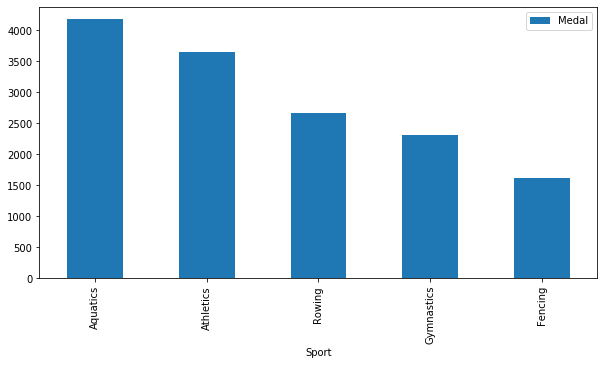

In [9]:
data.plot(x = 'Sport', y='Medal', kind ='bar', figsize=(10,5))

### 4. Which player has won most number of medals? (Top 5)

In [10]:
Medals= []

for Athlete in df['Athlete'].unique():
    Medals.append([ Athlete , len(df[df['Athlete']== Athlete])])

Medals = pd.DataFrame(Medals, columns = ['Athlete' , 'Medals']).sort_values(by = 'Medals' , ascending= False).head()

In [11]:
Medals

,Athlete,Medals
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


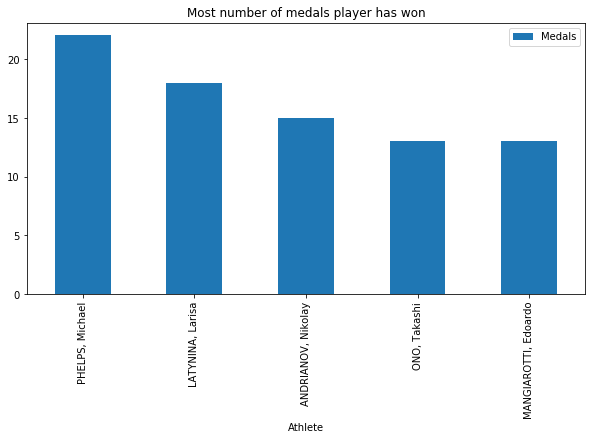

In [12]:
Medals.plot(x='Athlete', y='Medals', kind='bar', figsize=(10,5), title='Most number of medals player has won')

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [13]:
df = df[df['Medal'] == 'Gold']
 
players = []
for i in df['Athlete'].unique():
     players.append([i, len(df[df['Athlete'] == i])])

players =pd.DataFrame(players, columns = ['Athlete','Medals'])
players =players.sort_values(by = 'Medals', ascending = False).head()
players

,Athlete,Medals
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


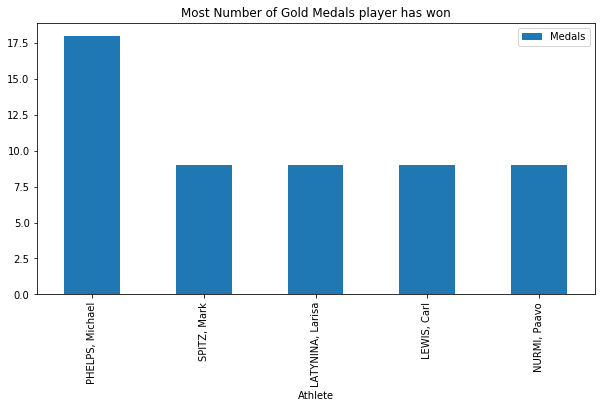

In [14]:
players.plot(x='Athlete', y='Medals', kind='bar', figsize=(10,5), title='Most Number of Gold Medals player has won')

### 6. In which year India won first Gold Medal in Summer Olympics?

In [15]:
df = df[df['Medal'] == 'Gold']
df = df[df['Country'] == 'IND']
 
data = []
for i in df['Year'].unique():
     data.append(i)
min(data)

1928

In [16]:
goldMedals = df[(df.Medal=='Gold') & (df.Country=='IND')].head(1)
goldMedals

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### 7. Which event is most popular in terms on number of players? (Top 5)

In [17]:
df = pd.read_csv("summer.csv")

Events=[]

for Event in df['Event'].unique():
    Events.append([Event,len(df[df['Event']== Event])])

Events = pd.DataFrame(Events,columns = ['Event','freq'])
Events = Events.sort_values(by='freq', ascending=False).head()
Events

,Event,freq
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


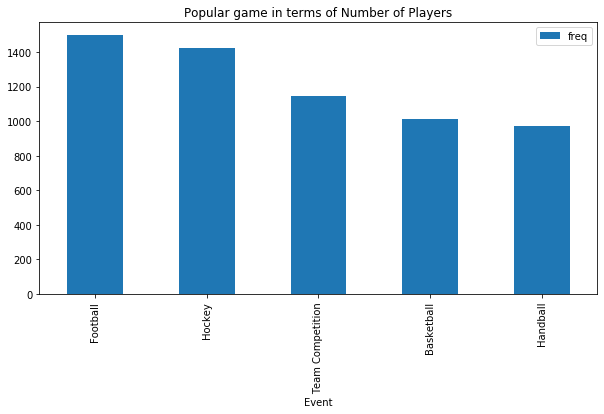

In [18]:
Events.plot(x='Event', y='freq', kind='bar', figsize = (10,5), title="Popular game in terms of Number of Players")

In [19]:
event=[]
event = df.groupby('Event').count()['Athlete'].head()
event = event.sort_values(ascending = False)
event

Event
+ 100KG (Super Heavyweight)           24
+ 100KG (Heavyweight)                 16
+ 105KG                                9
+ 100KG                                4
+ 108KG, Total (Super Heavyweight)     3
Name: Athlete, dtype: int64

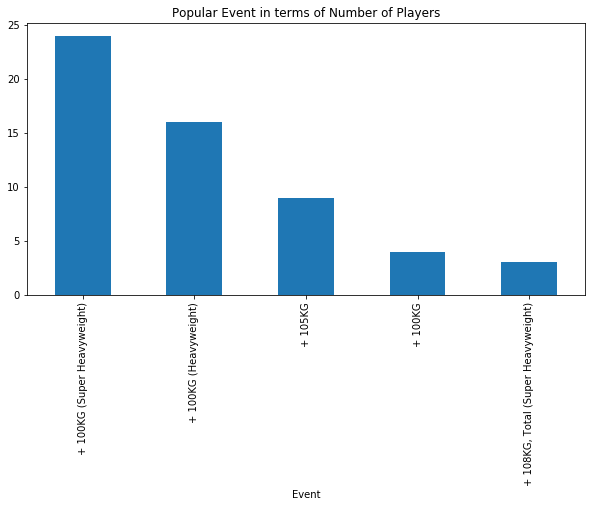

In [20]:
event.plot(x='Event', y='Number of players', kind='bar', figsize=(10,5), title='Popular Event in terms of Number of Players')

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [21]:
gender_counts = df.Gender.value_counts()
gender_counts

Men      22746
Women     8419
Name: Gender, dtype: int64

In [22]:
df_women = df[df['Gender'] == 'Women']
players = df_women[df_women['Medal'] == 'Gold']

players=players.groupby('Sport').count()['Medal']
players=players.sort_values(ascending = False).head()
players

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64

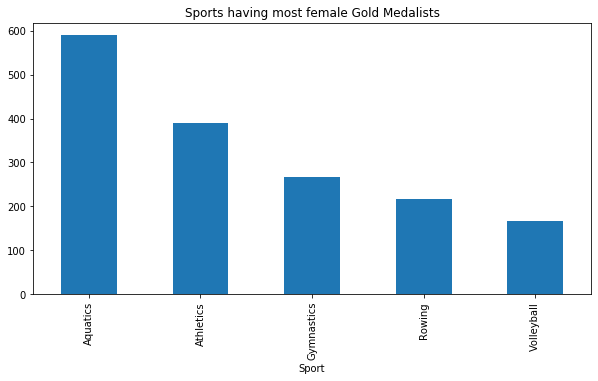

In [23]:
players.plot( x='Sports', y='Number of Gold Medals', kind='bar', figsize=(10,5), title='Sports having most female Gold Medalists')